In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

from tabula import read_pdf

pdf_url = 'https://globalassets.starbucks.com/assets/94fbcc2ab1e24359850fa1870fc988bc.pdf'

data = read_pdf(pdf_url, pages='all',output_format='dataframe',
                area=[76.87,72.73,531.76,657.89], guess=False, pandas_options={'header':None})

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brewed Coffee - Dark Roast,Short,NaN,NaN,236 mL,3.0,0.1,0.0,0.0,0.0,5,0,0,0.0,0.3,0%,0%,0%,0%,130
3,Brewed Coffee - Dark Roast,Tall,NaN,NaN,354 mL,4.0,0.1,0.0,0.0,0.0,10,0,0,0.0,0.5,0%,0%,0%,0%,193
4,Brewed Coffee - Dark Roast,Grande,NaN,NaN,473 mL,5.0,0.1,0.0,0.0,0.0,10,0,0,0.0,1,0%,0%,0%,0%,260


In [7]:
data.shape

(1284, 20)

# The following columns are represented in 'grams'
- Total Fat
- Saturated Fat
- Trans Fat
- Total Carbs
- Dietary Fiber
- Sugar
- Protein

# The following columns are represented in 'milligrams'
- Cholesterol
- Sodium
- Caffeine

In [8]:
columns={
    0: 'Product Name',
    1: 'Size',
    2: 'Milk',
    3: 'Whip',
    4: 'Serving Size',
    5: 'Calories',
    6: 'Total Fat',
    7: 'Saturated Fat',
    8: 'Trans Fat',
    9: 'Cholesterol',
    10: 'Sodium',
    11: 'Total Carbs',
    12: 'Dietary Fiber',
    13: 'Sugar',
    14: 'Protein',
    15: 'Vitamin A',
    16: 'Vitamin C',
    17: 'Calcium',
    18: 'Iron',
    19: 'Caffeine'
}
starbucks = data.copy()
starbucks = starbucks.rename(columns=columns)

starbucks.head()

,Product Name,Size,Milk,Whip,Serving Size,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbs,Dietary Fiber,Sugar,Protein,Vitamin A,Vitamin C,Calcium,Iron,Caffeine
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brewed Coffee - Dark Roast,Short,NaN,NaN,236 mL,3.0,0.1,0.0,0.0,0.0,5,0,0,0.0,0.3,0%,0%,0%,0%,130
3,Brewed Coffee - Dark Roast,Tall,NaN,NaN,354 mL,4.0,0.1,0.0,0.0,0.0,10,0,0,0.0,0.5,0%,0%,0%,0%,193
4,Brewed Coffee - Dark Roast,Grande,NaN,NaN,473 mL,5.0,0.1,0.0,0.0,0.0,10,0,0,0.0,1,0%,0%,0%,0%,260


In [9]:
print(starbucks.isna().sum().sort_values(ascending=False))
print('-----------------------------------')
print(starbucks.describe())
print('-----------------------------------')

Whip             680
Milk             214
Serving Size      65
Caffeine          41
Product Name      30
Size              25
Protein           20
Sugar             20
Dietary Fiber     20
Total Carbs       20
Sodium            20
Iron              20
Trans Fat         20
Saturated Fat     20
Total Fat         20
Calories          20
Vitamin A         20
Vitamin C         20
Calcium           20
Cholesterol       20
dtype: int64
-----------------------------------
          Calories    Total Fat  Saturated Fat    Trans Fat  Cholesterol  \
count  1264.000000  1264.000000    1264.000000  1264.000000  1264.000000   
mean    218.680617     6.097706       3.761551     0.392801    16.908228   
std     137.373477     5.846522       3.948624     3.257245    24.903891   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%     120.000000     1.000000       0.200000     0.000000     0.000000   
50%     210.000000     4.500000       2.500000     0.000000     5.000000   

# Inference about NaNs

- **Whip** has 680 NaNs because whipped cream isn't an add-on for those items
- **Milk** has 214 NaNs because milk can't be added to those items
- **Serving Size** The NaNs come from categorical grouping of *drinks that have an emphasis on espresso, or they are just addons.
- **Caffeine** These items just don't have caffeine
- **FOR THE REST OF THE COLUMNS** It can be inferred that the NaNs are just empty space, placeholder words or categorical groupings.

In [10]:
starbucks['Milk'].value_counts()

Nonfat     240
Soy        207
Whole      206
2%         204
Coconut    202
Whip         6
No Whip      5
Name: Milk, dtype: int64

In [11]:
starbucks['Whip'].value_counts()

Whip       293
No Whip    290
354 mL       8
473 mL       5
236 mL       4
709 mL       2
591 mL       2
Name: Whip, dtype: int64

In [12]:
starbucks['Caffeine'].value_counts(dropna=False)

0         244
75        134
150       125
95         57
40+        49
225        46
20         44
NaN        41
70         36
110        32
130        32
15         31
40         31
25         26
50         24
175        20
65         17
125        16
185        16
195        15
145        15
90         14
140        12
300        11
265        10
100        10
10         10
55         10
35         10
80         10
         ... 
170         5
115         5
155         4
280         3
340         2
90-110      2
235         2
180         2
45-55       2
35-45       2
470         1
360         1
320         1
380         1
445         1
70-85       1
5           1
475         1
425         1
310         1
193         1
255         1
135         1
260         1
205         1
275         1
410         1
330         1
270         1
200         1
Name: Caffeine, Length: 72, dtype: int64

In [32]:
starbucks['Sodium'].unique()

array(['5', '10', 'Siz5e', '45', '50', '40', 45, '70', '80', '60', '90',
       100, '95', 90, '115', 130, '120', '100', 'Ch1o0les', 'So1d0iu',
       '15', '30', '25', '35', '65', '55', '75', '20', '85', '135', '125',
       '105', '150', '170', '130', '190', '200', '140', '160', '110',
       '180', '0', '3', '2', '220', '210', '230', '240', '250', '300',
       '320', '310', '270', '280', '290', '260', '1', '4', '330', '340',
       '350', '360', '370'], dtype=object)

In [33]:
starbucks['Caffeine'].unique()

array([130. , 193. , 260. , 340. ,  15. ,  20. ,  25. ,  30. , 155. ,
       235. , 310. , 410. , 180. , 270. , 360. , 475. ,  75. , 115. ,
       150. , 195. , 190. , 280. , 380. , 470. , 255. , 425. , 170. ,
       120. , 165. ,  90. , 110. , 125. , 205. , 200. , 300. , 330. ,
       140. , 185. , 275. , 320. , 225. ,  95. , 175. , 265. , 375. ,
        22.5,  27.5,  47.5,  52.5,  50. ,  70. , 145. ,  40. ,   7.5,
        20.5,  55. ,  80. ,   0. ,  65. ,  77.5, 100. , 135. ,  45. ,
        10. ,  35. ,   5. ])

## 'Milk' and 'Whip' columns need to be fixed

- There are a few values in Whip that belong in Milk, and a few values from Milk that belong in Whip
- Possible solutions:
- Ask for help with regards to figuring out a function that would be able to map it or locate the row that those values belong to
- Figure out if they fit into any of the NaNs in a row?
- Try to do this before doing any real analysis, because this could mess things up for a correlation heatmap.

# TODOs:
**1)** Figure out the NaNs / why there are NaNs  
**2)** Product Name column has 66 NaNs, where it should be the drink size  
**3)** Serving size is a string, needs to be an integer/float preferably float  
**4)** Clean/Replace NaNs in rows  
**5)** Actually a lot of columns have % signs in them so we'll have to do something about that  
**6)** Remove the ROWS that categorize the drinks, and instead create a new column that categorizes them  
**7)** Also rename those columns


In [14]:
### use this cell for cleaning functions
def remove_percent(string):
    x = string.strip('%')
    return float(x)

def remove_ml(data,string):
    if data.str.contains(' mL'):
        x = string.strip(' mL')
        return float(x)
    else:
        pass

In [15]:
# starbucks['Vitamin A'] = starbucks['Vitamin A'].apply(remove_percent)
# starbucks['Vitamin C'] = starbucks['Vitamin C'].apply(remove_percent)
# starbucks['Calcium'] = starbucks['Calcium'].apply(remove_percent)

## Taking a step back to look at which columns we want to drop for this project  

The FDA has this article about 'nutrition facts at-a-glance' for those who just glance at Nutrition Facts Labels.  

The link is here:   https://www.fda.gov/food/resourcesforyou/consumers/ucm267499.htm  

From the article we can see that Serving Size is pretty important, but the serving size column in our Starbucks data is basically (if not, most of) the cup of drink being served. And from that i'm making the decision to not include that in our exploratory analysis, and instead focusing on the following:  

- Calories
- Total Fat
- Saturated Fat
- Trans Fat
- Cholesterol
- Sodium
- Carbs 
- Sugar
- Dietary Fiber
- Protein
- **and my personal favorite** Caffeine

I plan on exploring these for the following reasons:

- Calories are listed for **one** serving of the drink
- Unlike a traditional Nutrition label, this Starbucks table does not have a measure for **% of Daily Value**
- So we're basically going to be looking at the nutrients that have the highest rate of causing disease.
- It's important to note that we are looking for a balanced "Starbucks Diet".
- Eating too much total fat (especially saturated and trans fat), cholestorol or sodium may increase your risk of certain diseases, such as heart disease, some cancers, or high blood pressure in your later years. 


# Why Fat?

To understand why we are looking at Fat, we need to know what fat is.  
**Fat** is a nutrient that is a majro source of energy for the body. It helps you absorb certain important vitamins, provides taste and helps you feel full.  
And it's important to keep in mind that there's a simple distinction between types of fats. There are **Good** and **Undesirable** types of fats. Notice how I didn't differentiate between *Good* and *Bad*? That's because I don't believe that there is any **BAD** fats, just understanding that these things can be enjoyed in moderation, like alcohol and recreational drugs!  
## **Good Fat** = **Unsaturated Fat**
**Examples**
- plant-based oils
- nuts

## **Undesirable Fat** = **Saturated and Trans Fat**

**Examples**
- meat
- butter
- cheese
- ice cream


In [17]:
#dropping columns that i'm not using
starbucks.drop(columns=[
    'Serving Size',
    'Vitamin A',
    'Vitamin C',
    'Calcium',
    'Iron'
], inplace=True)

In [18]:
starbucks.dropna(thresh=13, inplace=True)
starbucks.isna().sum()

Product Name      17
Size               0
Milk             186
Whip             655
Calories           0
Total Fat          0
Saturated Fat      0
Trans Fat          0
Cholesterol        0
Sodium             0
Total Carbs        0
Dietary Fiber      0
Sugar              0
Protein            0
Caffeine          18
dtype: int64

In [19]:
starbucks['Product Name'].replace(np.NaN, '?', inplace=True)

In [20]:
starbucks['Caffeine'].replace(np.NaN, '?', inplace=True)

In [21]:
starbucks = starbucks[starbucks['Product Name'] != '?']
starbucks = starbucks[starbucks['Caffeine'] != '?']

In [22]:
starbucks['Milk'].replace(np.NaN, 'N/A', inplace=True)
starbucks['Whip'].replace(np.NaN, 'N/A', inplace=True)

starbucks.isna().sum()

Product Name     0
Size             0
Milk             0
Whip             0
Calories         0
Total Fat        0
Saturated Fat    0
Trans Fat        0
Cholesterol      0
Sodium           0
Total Carbs      0
Dietary Fiber    0
Sugar            0
Protein          0
Caffeine         0
dtype: int64

In [34]:
starbucks['Caffeine'].replace('40+', 40, inplace=True)
starbucks['Caffeine'].replace('45-55', 50, inplace=True)
starbucks['Caffeine'].replace('90-110', 100, inplace=True)
starbucks['Caffeine'].replace('35-45', 40, inplace=True)
starbucks['Caffeine'].replace('70-85', 77.5, inplace=True)
starbucks['Caffeine'].replace('20-25', 22.5, inplace=True)
starbucks['Caffeine'].replace('25-30', 27.5, inplace=True)
starbucks['Caffeine'].replace('40-45', 42.5, inplace=True)
starbucks['Caffeine'].replace('45-50', 47.5, inplace=True)
starbucks['Caffeine'].replace('50-55', 52.5, inplace=True)
starbucks['Caffeine'].replace('1--15', 7.5, inplace=True)
starbucks['Caffeine'].replace('16-25', 20.5, inplace=True)
### For sodium, the strings were parsed incorrectly by tabula, 
### so what I infer is just the numbers inbetween the characters of the string
### Seems reasonable
starbucks['Sodium'].replace('M4il5k', 45, inplace=True)
starbucks['Sodium'].replace('Se1r0v0in', 100, inplace=True)
starbucks['Sodium'].replace('Ca9lo0ri', 90, inplace=True)
starbucks['Sodium'].replace('To1t3a0l', 130, inplace=True)
starbucks['Sodium'].replace('Siz5e', 5, inplace=True)
starbucks['Sodium'].replace('Ch1o0les', 10, inplace=True)
starbucks['Sodium'].replace('So1d0iu', 10, inplace=True)

starbucks['Caffeine'] = starbucks['Caffeine'].astype(float,copy=False)
starbucks['Sodium'] = starbucks['Sodium'].astype(float,copy=False)

In [35]:
# starbucks = starbucks[(starbucks['Whip'].isin(['Whip','No Whip'])) | (starbucks['Milk'].isin(['Nonfat',
#                                                                                       'Soy',
#                                                                                       'Whole',
#                                                                                       '2%',
#                                                                                       'Coconut']))
# ]

# starbucks
                       
#uncomment this cell if you want to remove the N/As                       

Okay now that it's sort of clean now, we can start doing some simple visualizations, and find some trends. Going to start off using seaborn and go to plotly when i'm happy with the seaborn visualizations.  

https://www.caffeineinformer.com/caffeine-safe-limits  

Caffeine Informer regards the recommended amount of caffeine per individual given their age and diet

# Recommended Caffeine by Age

- Ages 12 and Under : **45mg** or just **not recommended**
- Ages 13-18 : **No more than 100 mg of caffeine** *woops*
- Adults : **400 mg daily** no more than **200 mg** in a single dose

In [36]:
## going to create dataframes to separate the main starbucks data by
## values in their columns
## kind of like in the cell above, except with conditions
barely_any_caffeine = starbucks.loc[(starbucks['Caffeine'] >= 0) & (starbucks['Caffeine'] <= 49.999)]
low_caffeine = starbucks.loc[(starbucks['Caffeine'] <= 100.0) & (starbucks['Caffeine'] >= 50.0)]
medium_caffeine = starbucks.loc[(starbucks['Caffeine'] <= 199.999) & (starbucks['Caffeine'] >= 100.001)]
high_caffeine = starbucks.loc[starbucks['Caffeine'] >= 200.0]


print('Shape of barely caffeinated drinks {}'.format(barely_any_caffeine.shape))
print('Shape of low caffeinated drinks {}'.format(low_caffeine.shape))
print('Shape of medium caffeinated drinks {}'.format(medium_caffeine.shape))
print('Shape of highly caffeinated drinks {}'.format(high_caffeine.shape))

Shape of barely caffeinated drinks (491, 15)
Shape of low caffeinated drinks (319, 15)
Shape of medium caffeinated drinks (317, 15)
Shape of highly caffeinated drinks (94, 15)


In [37]:
## going to show that the sums are the same

shapes = [barely_any_caffeine.shape[0], low_caffeine.shape[0], medium_caffeine.shape[0], high_caffeine.shape[0]] 

sum_shapes = sum(shapes)
print('Expected shape for Starbucks data {}'.format(starbucks.shape))
print('Are the shapes of the split dataframes and the original frame the same? \n{}'.format(sum_shapes==starbucks.shape[0]))


Expected shape for Starbucks data (1221, 15)
Are the shapes of the split dataframes and the original frame the same? 
True


In [38]:
low_caffeine

,Product Name,Size,Milk,Whip,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbs,Dietary Fiber,Sugar,Protein,Caffeine
22,Caffè Misto,Short,Nonfat,N/A,35.0,0.1,0.1,0.0,0.0,45.0,5,0,5.0,4,75.0
23,Caffè Misto,Short,2%,N/A,50.0,2.0,1.0,0.1,10.0,50.0,5,0,5.0,4,75.0
24,Caffè Misto,Short,Whole,N/A,70.0,3.5,2.0,0.1,10.0,50.0,5,0,5.0,3,75.0
25,Caffè Misto,Short,Soy,N/A,40.0,1.5,0.2,0.0,0.0,40.0,3,0,2.0,3,75.0
26,Caffè Misto,Short,Coconut,N/A,40.0,2.5,2.5,0.0,0.0,45.0,4,0,3.0,0.4,75.0
58,Iced Coffee with Milk,Tall,Nonfat,N/A,80.0,0.1,0.0,0.0,0.0,30.0,17,0,17.0,2,90.0
59,Iced Coffee with Milk,Tall,2%,N/A,80.0,1.0,0.5,0.0,5.0,30.0,17,0,17.0,2,90.0
60,Iced Coffee with Milk,Tall,Whole,N/A,90.0,1.5,1.0,0.0,5.0,30.0,17,0,17.0,2,90.0
61,Iced Coffee with Milk,Tall,Soy,N/A,80.0,1.0,0.1,0.0,0.0,25.0,16,0,16.0,2,90.0
88,Caffè Americano,Short,N/A,N/A,5.0,0.0,0.0,0.0,0.0,5.0,1,0,0.0,0,75.0


# TODO:
- Find relationships between caffeinated drinks?
- Visualize caffeinated drinks and their differences
- So far the relationship that i'm looking at is in regards to the Size
- For example, what's the most common occurance in size for the range of caffeine?
- And to visualize that we can do a scatterplot? Or a barplot that counts the sizes in variation by caffeine level
- **THIS IS JUST MY BRAINSTORMING PLS NO FLAME**
- I guess we should be looking to create visualizations around asking questions?
- So here are a few questions I could ask : 
- *1) Do drinks with less caffeine have more sugar/sodium or less sugar than drinks with more caffeine?*
- I feel like this quesiton just has many variations to it
- We can also find relationships between the milk used for certain drinks and which contribute to 'better' nutrition data



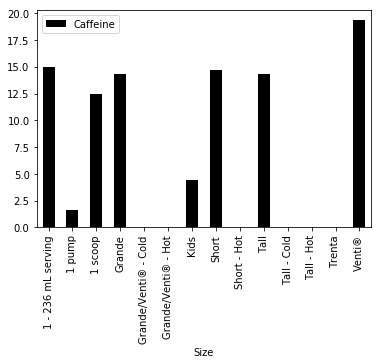

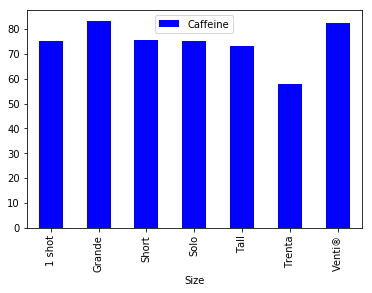

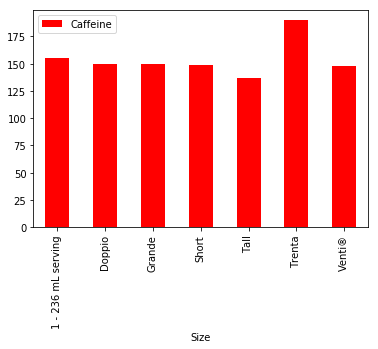

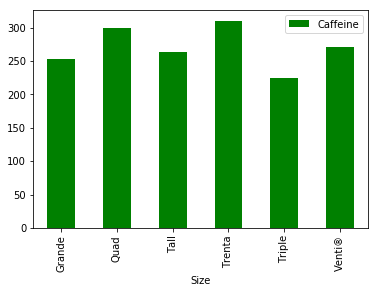

In [42]:
barely_any_caffeine.pivot_table('Caffeine', 'Size').plot(kind='bar',stacked=True,color='k');
low_caffeine.pivot_table('Caffeine', 'Size').plot(kind='bar',stacked=True,color='b');
medium_caffeine.pivot_table('Caffeine', 'Size').plot(kind='bar',stacked=True,color='r');
high_caffeine.pivot_table('Caffeine', 'Size').plot(kind='bar',stacked=True,color='g');